# PIV analysis and Plotting
Code set using data from PIV experiments on 09-21-17<br>
$U_\infty = 4.5 (400rpm)$<br>
Test 0: <br>
Data taken at 500Hz continuously<br>
Test 1: <br>
Data taken at 500Hz for 100 images on a 1Hz loop<br>
Test 2: <br>
Data taken at 500Hz for 500 images on a .5Hz loop<br>
Test 3: <br>
Data taken at 500Hz continuously<br><br>
Laser Power = 14amps <br>
Last updated: 09-26-17 <br>
Code Strucutre: <br>
- import libraries <br>
- run analysis codes <br>
- read in data <br>
- plot outer <br>
- plot inner <br>

In [1]:
import pandas as pd
import numpy as np
import PIV as piv
import time_series as ts
import time
import sys
import h5py
from scipy.signal import medfilt
import matplotlib.pyplot as plt
import hotwire as hw
import imp
from datetime import datetime
%matplotlib inline 
now = datetime.now()
#for setting movie
import time
import pylab as pl
from IPython import display

In [2]:
# import functions to be run
imp.reload(ts)
imp.reload(piv)
imp.reload(hw)
%run 'air_prop.py'
%run 'piv_outer.py'
%run 'piv_readin.py'
%run 'piv_inner.py'

# Read in and Filter Datasets

In [3]:
## DATA SET READ IN ##
#data sets taken continuously (test_0, test_3)
#Parameter set
date = '092117_0'
data_delimiter = '\t'
num_images = 10917
sizex = 128
sizey = 129
walloffset = 2 #mm
side_error = 5
#determine file name
file_name = dict()
for j in range(1, num_images+1):
    file_name[j] = '/B' + str('{0:05}'.format(j)) + '.txt'
#list name of data set folders
base_name = dict()
#List the base name for each test to be read in and analyzed, names taken directly from folder
base_name[0] = '/media/drummond/My Passport/DATA/FPF/test_092117/Cam_Date=170921_Time=120913_TR_SeqPIV_MP(1x16x16_50ov_ImgCorr)=unknown'
base_name[1] = '/media/drummond/My Passport/DATA/FPF/test_092117/Cam_Date=170921_Time=140859_TR_SeqPIV_MP(1x16x16_50ov_ImgCorr)=unknown'
[u, v, x, y, bad_im] = piv_readin(date, file_name, base_name, num_images, data_delimiter, sizex, sizey, walloffset, side_error)

Reading In: |██████████████████████████████████████████████████| 100.0% Complete
Done Read in!
Reading In: |██████████████████████████████████████████████████| 100.0% Complete
Done Read in!
Mask Found!
Data Saved!


In [ ]:
## DATA SET READ IN ##
#data set taken on cycle, 100 images every 1hz (test_1)
#Parameter set
date = '092117_1'
data_delimiter = '\t'
num_images = 10907
sizex = 128
sizey = 129
walloffset = 2 #mm
side_error = 5
#determine file name
file_name = dict()
for j in range(1, num_images+1):
    file_name[j] = '/B' + str('{0:05}'.format(j)) + '.txt'
#list name of data set folders
base_name = dict()
#List the base name for each test to be read in and analyzed, names taken directly from folder
base_name[0] = '/media/drummond/My Passport/DATA/FPF/test_092117/Cam_Date=170921_Time=124152_TR_SeqPIV_MP(1x16x16_50ov_ImgCorr)=unknown'
piv_readin(date, file_name, base_name, num_images, data_delimiter, sizex, sizey, walloffset, side_error)



In [ ]:
## DATA SET READ IN ##
#data set taken on cycle, 500 images every .5hz (test_1)
#Parameter set
date = '092117_2'
data_delimiter = '\t'
num_images = 10520
sizex = 128
sizey = 129
walloffset = 2 #mm
side_error = 5
#determine file name
file_name = dict()
for j in range(1, num_images+1):
    file_name[j] = '/B' + str('{0:05}'.format(j)) + '.txt'
#list name of data set folders
base_name = dict()
#List the base name for each test to be read in and analyzed, names taken directly from folder
base_name[0] = '/media/drummond/My Passport/DATA/FPF/test_092117/Cam_Date=170921_Time=130741_TR_SeqPIV_MP(1x16x16_50ov_ImgCorr)=unknown'
piv_readin(date, file_name, base_name, num_images, data_delimiter, sizex, sizey, walloffset, side_error)


# Mean Velocity Plots

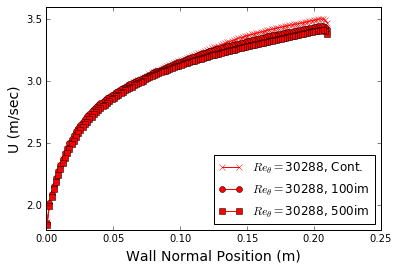

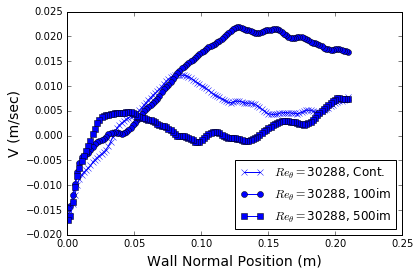

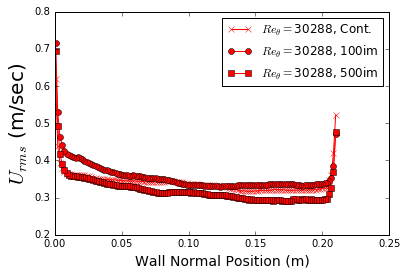

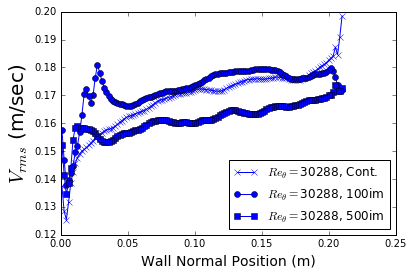

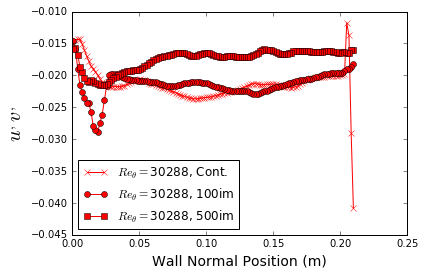

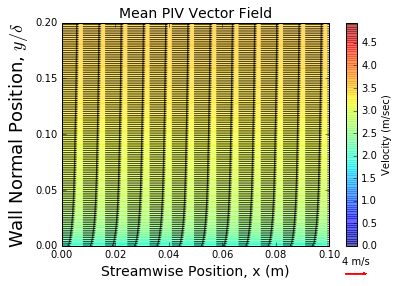

Done!


In [4]:
# Plot Outer Normalized Data
date = '092117'
legend = [r'$Re_{\theta}=$30288, Cont.', r'$Re_{\theta}=$30288, 100im', r'$Re_{\theta}=$30288, 500im']
num_tests = 3
piv_outer(date, num_tests, legend)

# Inner Normalized Plots

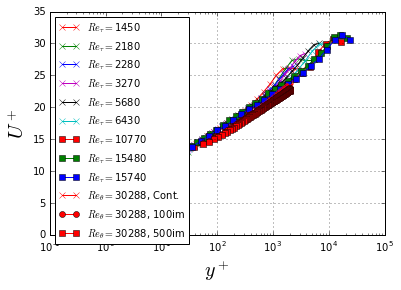

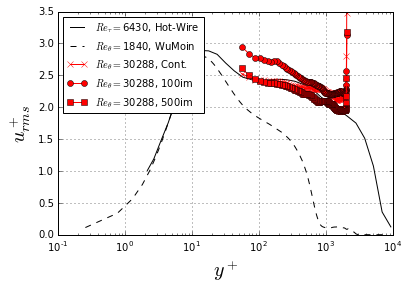

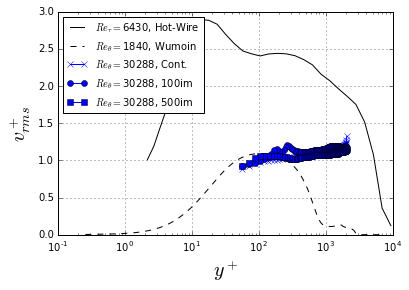

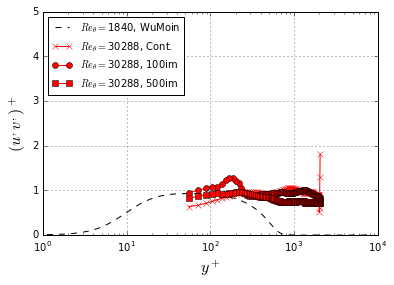

In [5]:
##Plot Inner Normalized Data##
date = '092117'
num_tests = 3
utau = .15
legend = [r'$Re_{\theta}=$30288, Cont.', r'$Re_{\theta}=$30288, 100im', r'$Re_{\theta}=$30288, 500im']
piv_inner(date, num_tests, utau, legend)

# Control Volume Analysis
Procedure: <br>
1). Create mean velocity field from mean u and v velocity fields ($(u^2 + v^2)^{1/2}$)<br>
2). Integrate left side of image (control volume in) <br>
3). Integrate right side of image (control volumne out) <br>
4). Calculate difference (control volume delta) and divide by streamwise length of FOV

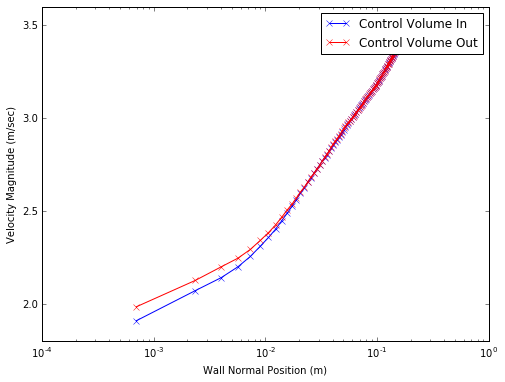

In [6]:
## Control Volume Analysis ##
umean = np.nanmean(u[0], axis=0)
vmean = np.nanmean(v[0], axis=0)
mean_vel = np.sqrt(umean**2 + vmean**2)
#print(np.shape(mean_vel))
cv_in = np.trapz(mean_vel[:, 0], x = y)*-1
cv_out = np.trapz(mean_vel[:, -1], x = y)*-1
cv_delta = cv_out - cv_in
vel_out_y = cv_delta / (x[-1] - x[0])

plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.semilogx(y, mean_vel[:, 0], '-xb')
plt.semilogx(y, mean_vel[:, -1], '-xr')
plt.legend(['Control Volume In', 'Control Volume Out'])
plt.ylabel('Velocity Magnitude (m/sec)')
plt.xlabel('Wall Normal Position (m)')

The control volume input is {{print('%.4g'%(cv_in))}} $m^2/sec$ <br>
The control volume ouput is {{print('%.4g'%(cv_out))}} $m^2/sec$ <br>
Giving a difference of {{print('%.4g'%(cv_delta))}} <br>
For which the top length of the control volume is {{ x[-1] - x[0] }}m <br>
Giving the average v velocity to be {{print('%.4g'%(vel_out_y))}} $m/sec$


# Pixel Locking
Procedure: Take masked and filtered datasets <br>
1). Convert into 1-D vector of all velocities (10520 images x 127 rows x 97 columns) <br>
2). Convert into displacement using known image frequency ($500hz$) <br>
3). Convert into # of pixel displacement by using calibration size ($.2mm/pixel$)

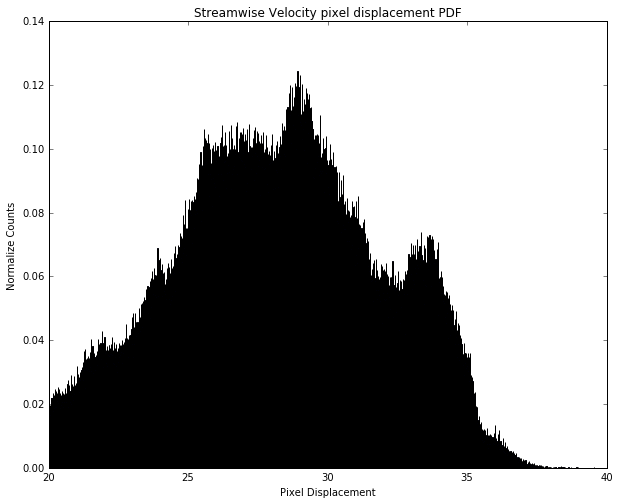

(2, 10917, 127, 68)

In [11]:
freq = 500 #hz
pixel_size = 0.0002 #mm/pixel
#calculate displacement in x dir
x_disp = u[0]*(1/freq)
#organize into 1-d vector
x_disp = np.array(np.reshape(x_disp, [1, 127*68*10917]))[0]
#calculate in pixel disp
x_disp = x_disp / pixel_size
#plot
plt.figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.hist(x_disp[0:1000000], bins=5000, range=[20, 40], normed=True)
plt.title('Streamwise Velocity pixel displacement PDF')
plt.xlabel('Pixel Displacement')
plt.ylabel('Normalize Counts')
plt.show()
np.shape(u)

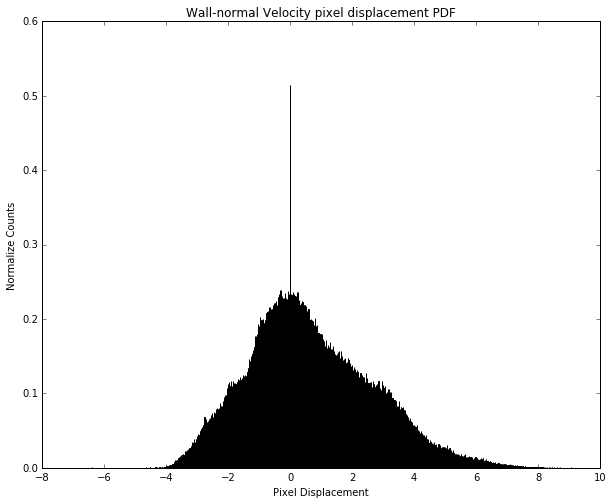

In [12]:
#calculate displacement in y dir
y_disp = v[0]*(1/freq)
#organize into 1-d vector
y_disp = np.array(np.reshape(y_disp, [1, 127*68*10917]))[0]
#calculate in pixel disp
y_disp = y_disp / pixel_size
#plot
plt.figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.hist(y_disp[:1000000], bins=5000, normed=True)
plt.title('Wall-normal Velocity pixel displacement PDF')
plt.xlabel('Pixel Displacement')
plt.ylabel('Normalize Counts')
plt.show()

# Autocorrelation Plot
Procedure: <br>
-working to examine when each point in the velocity field becomes time indep. <br>
- in development

In [ ]:
np.shape(u)

# Conculsions
Velocity plots: <br>
- Mean data matches well with other experimental and DNS datasets <br>
- U component collapes for all statistics examined <br>
- V component is correct order but is not resolved due to low dynamic range <br>
- CONTROL VOLUME ANALYSIS: V is order .001 $m/sec$ <br>
- PIXEL DISP PDFs: No evidence of pixel locking <br>

# To Do
- Increase dynamic range through increasing resolution of v velocity displacement by increasing $Re$ and decreasing image frame rate ($\Delta T$)